In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

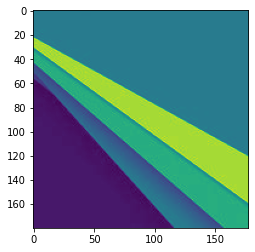

In [38]:
img1 = cv2.imread("line.png")
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

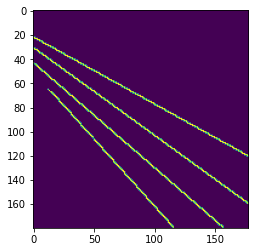

In [39]:
edges = cv2.Canny(img,300,300)
plt.imshow(edges)

In [40]:
lines = cv2.HoughLines(edges,5,np.pi/180,210,)
lines.shape

(5, 1, 2)

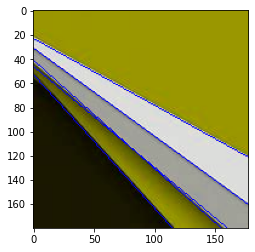

In [41]:
img1 = cv2.imread("line.png")
for i in lines:
    r,th = i[0]
    
    a = np.cos(th)
    b = np.sin(th)
    
    x = r*a
    y = r*b
    
    x1 = int(x + 1000*(-b))
    y1 = int(y + 1000*(a))
    x2 = int(x - 1000*(-b))
    y2 = int(y - 1000*(a))
    
    cv2.line(img1,(x1,y1), (x2,y2), (0,0,255),1)
plt.imshow(img1)

# Houghlines P

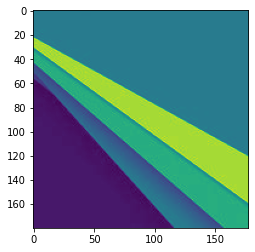

In [42]:
img1 = cv2.imread("line.png")
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

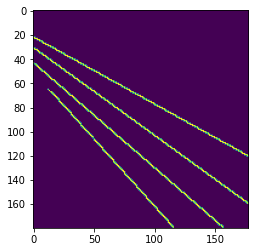

In [43]:
edges = cv2.Canny(img,300,300)
plt.imshow(edges)

In [44]:
lines = cv2.HoughLinesP(edges,3,np.pi/180,10,)
lines.shape

(57, 1, 4)

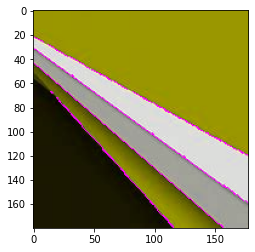

In [45]:
img1 = cv2.imread("line.png")
for i in lines:
    x1,y1,x2,y2 = i[0]
    
    cv2.line(img1,(x1,y1), (x2,y2), (255,0,255),1)
plt.imshow(img1)

# Hough Circles

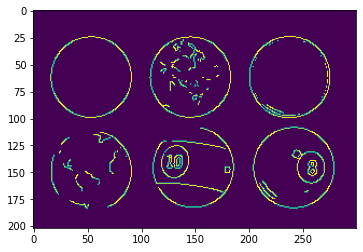

In [46]:
img = cv2.imread("circle.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.Canny(img,250,300)
plt.imshow(img)


In [47]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2,50, 500,250)
circles.shape

(1, 6, 3)

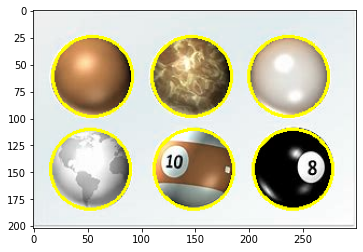

In [48]:
img1 = cv2.imread("circle.png")
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    center = (i[0], i[1])
    radius = i[2]
    
    cv2.circle(img1, center,radius,(255,255,0),2)
plt.imshow(img1)

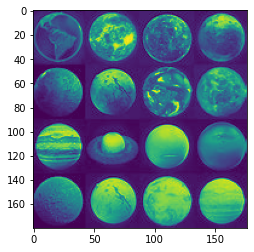

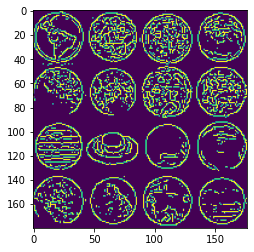

In [49]:
img = cv2.imread("circle1.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()
img = cv2.Canny(img,100,100)
plt.imshow(img)


In [50]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 15,30, 600,200)
circles.shape

(1, 15, 3)

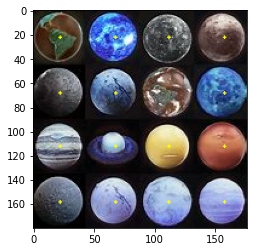

In [51]:
img1 = cv2.imread("circle1.png")
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    center = (i[0], i[1])
    radius = i[2]*0
    
    cv2.circle(img1, center,radius,(255,255,0),2)
plt.imshow(img1)

# Corner Detection

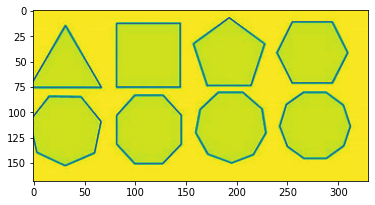

In [305]:
img = cv2.imread("corner.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [306]:
corners = cv2.goodFeaturesToTrack(img,50,0.001,5)
corners.shape

(50, 1, 2)

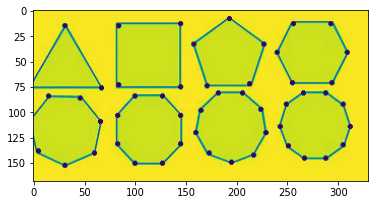

In [307]:
img1 = cv2.imread("corner.png",0)
corners = np.int0(corners)
for i in corners:
    center = ( i[0,0],i[0,1])
    cv2.circle(img1,center,1,(0,255,255),2)
plt.imshow(img1)

In [308]:
img1 = cv2.imread("corner.png")
corners = cv2.cornerHarris(img,3,3,0.02)

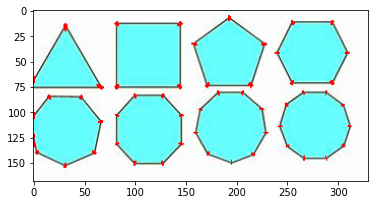

In [309]:
img1[corners >0.01*corners.max()] =[255,0,0]
plt.imshow(img1)

# Circle and Ellipse Dectection

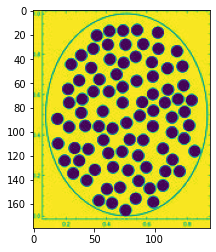

In [466]:
img = cv2.imread("circle2.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5))
# img = cv2.erode(img,kernel)
# img = cv2.dilate(img,kernel)
# img = cv2.Canny(img,50,50)
plt.imshow(img)

In [467]:
para = cv2.SimpleBlobDetector_Params()

In [468]:
para.filterByArea=True
params.minArea = 10
para.filterByCircularity=True
para.minCircularity = 0.9
para.filterByColor=True
para.filterByConvexity=True
params.minConvexity = 0.2
para.filterByInertia=True
params.minInertiaRatio = 0.01

In [469]:
dectector = cv2.SimpleBlobDetector_create(para)

In [470]:
keypoints = dectector.detect(img)
keypoints

(<KeyPoint 00000203E5024300>,
 <KeyPoint 00000203E5011D70>,
 <KeyPoint 00000203E507AD90>,
 <KeyPoint 00000203E507BC30>,
 <KeyPoint 00000203E507BED0>,
 <KeyPoint 00000203E507B9F0>,
 <KeyPoint 00000203E50799E0>,
 <KeyPoint 00000203E507B780>,
 <KeyPoint 00000203E507BF90>,
 <KeyPoint 00000203E507BC90>,
 <KeyPoint 00000203E507B960>,
 <KeyPoint 00000203E507BDB0>,
 <KeyPoint 00000203E507BFC0>,
 <KeyPoint 00000203E507BBD0>,
 <KeyPoint 00000203E507A2B0>,
 <KeyPoint 00000203E507BE70>,
 <KeyPoint 00000203E507B900>,
 <KeyPoint 00000203E507A010>,
 <KeyPoint 00000203E507BEA0>,
 <KeyPoint 00000203E507BC60>,
 <KeyPoint 00000203E504C1B0>,
 <KeyPoint 00000203E504C210>,
 <KeyPoint 00000203E504FBA0>,
 <KeyPoint 00000203E504FA20>,
 <KeyPoint 00000203E504F930>,
 <KeyPoint 00000203E504F960>,
 <KeyPoint 00000203E504F900>,
 <KeyPoint 00000203E504FA80>,
 <KeyPoint 00000203E504FA50>,
 <KeyPoint 00000203E504C1E0>,
 <KeyPoint 00000203E504FB40>,
 <KeyPoint 00000203E504FB70>,
 <KeyPoint 00000203E4ECA3A0>,
 <KeyPoint

In [471]:
blank = np.zeros((5,5))

In [474]:
img = cv2.imread("circle2.png")
blobs = cv2.drawKeypoints(img,keypoints,blank,(0,255,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

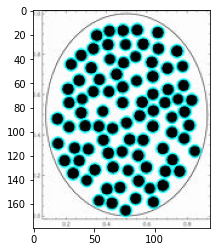

In [475]:
plt.imshow(blobs)